In [3]:
import pandas as pd

# Load the CSV file
file_path = '~/Data project/Data_Project/ONS_smoking_habits_in_the_uk_and_its_constituent_countries/Table_9.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print(data.head())

  Country code  Country      Highest level of education  \
0    E92000001  England            Degree or equivalent   
1    E92000001  England                Higher education   
2    E92000001  England       GCE A level or equivalent   
3    E92000001  England  GCSE grades A*-C or equivalent   
4    E92000001  England             Other qualification   

   2022 \nCurrent smokers \n%  2022\nCurrent smokers \nLCL  \
0                         6.6                          6.2   
1                        11.0                          9.9   
2                        13.9                         13.2   
3                        19.2                         18.3   
4                        24.2                         22.6   

   2022 \nCurrent smokers \nUCL  2022\nEx-smokers \n%  \
0                           7.1                  18.7   
1                          12.2                  26.7   
2                          14.6                  23.7   
3                          20.1             

In [33]:
# Clean the column names
data.columns = data.columns.str.replace('\n', ' ').str.replace(' ', '_').str.replace('__', '_').str.strip()
print(data.columns.tolist())


['Country_code', 'Country', 'Highest_level_of_education', '2022_Current_smokers_%', '2022Current_smokers_LCL', '2022_Current_smokers_UCL', '2022Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-smok

In [5]:
# Adjusted column names based on the inspection
columns_of_interest = [
    'Country', 'Highest_level_of_education',
    '2022_Current_smokers_%', '2022Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

# Select relevant columns for the year 2022
data_2022 = data[columns_of_interest].copy()
print(data_2022.head())


   Country      Highest_level_of_education  2022_Current_smokers_%  \
0  England            Degree or equivalent                     6.6   
1  England                Higher education                    11.0   
2  England       GCE A level or equivalent                    13.9   
3  England  GCSE grades A*-C or equivalent                    19.2   
4  England             Other qualification                    24.2   

   2022Current_smokers_LCL  2022_Current_smokers_UCL  2022Ex-smokers_%  \
0                      6.2                       7.1              18.7   
1                      9.9                      12.2              26.7   
2                     13.2                      14.6              23.7   
3                     18.3                      20.1              26.0   
4                     22.6                      25.8              23.2   

   2022_Ex-smokers_LCL  2022_Ex-smokers_UCL  2022_Never_smoked_%  \
0                 18.2                 19.3                 74.6  

In [6]:
# Convert percentage columns to numeric
percentage_columns = [
    '2022_Current_smokers_%', '2022Current_smokers_LCL', '2022_Current_smokers_UCL',
    '2022Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL',
    '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL'
]

for col in percentage_columns:
    data_2022[col] = pd.to_numeric(data_2022[col], errors='coerce')

# Check for missing data
missing_data_summary = data_2022.isnull().sum()
print(missing_data_summary)


Country                       0
Highest_level_of_education    0
2022_Current_smokers_%        0
2022Current_smokers_LCL       0
2022_Current_smokers_UCL      0
2022Ex-smokers_%              0
2022_Ex-smokers_LCL           0
2022_Ex-smokers_UCL           0
2022_Never_smoked_%           0
2022_Never_smoked_LCL         0
2022_Never_smoked_UCL         0
dtype: int64


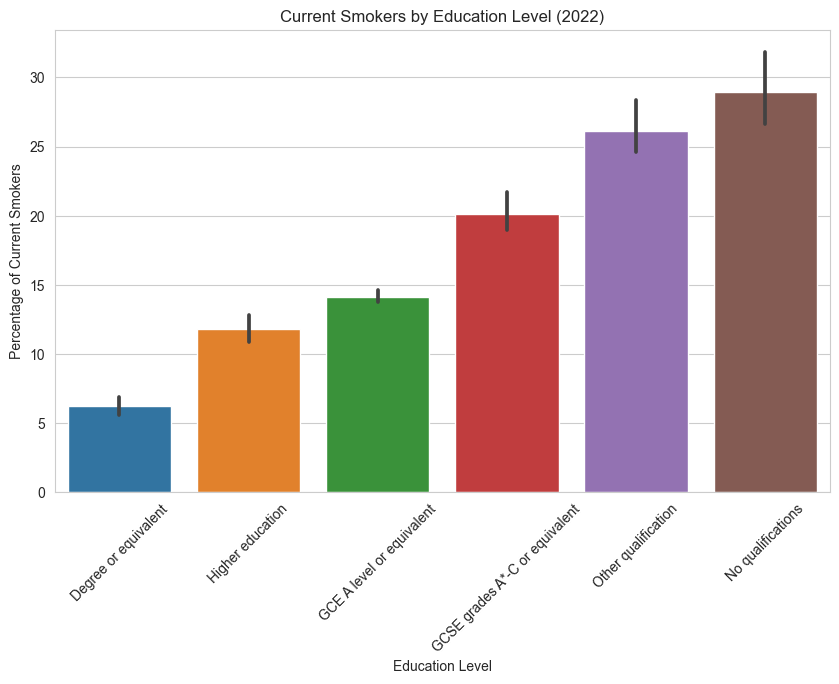

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for current smokers by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Highest_level_of_education', y='2022_Current_smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Current Smokers by Education Level (2022)')
plt.ylabel('Percentage of Current Smokers')
plt.xlabel('Education Level')
plt.show()


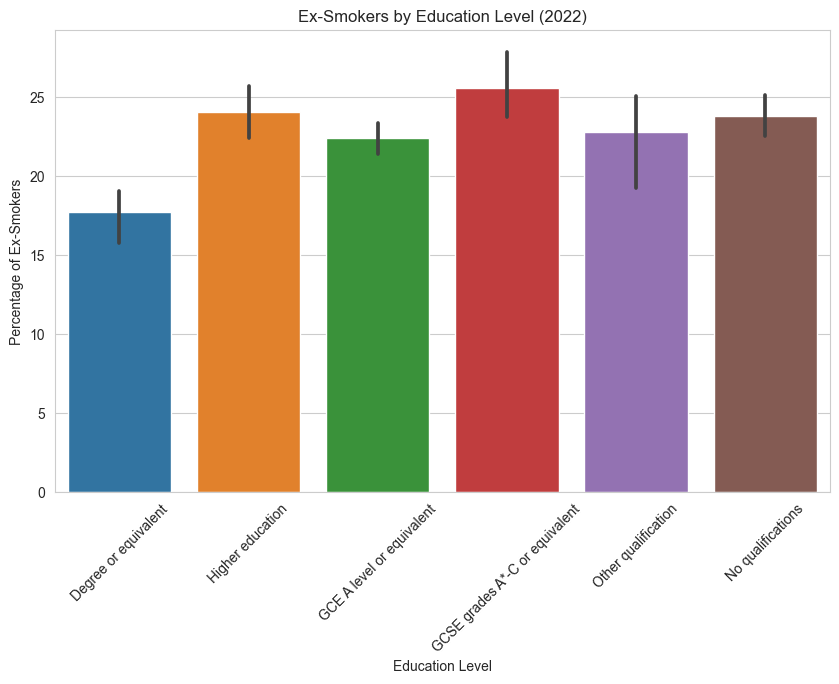

In [8]:

# Create a bar plot for ex-smokers by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Highest_level_of_education', y='2022Ex-smokers_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Ex-Smokers by Education Level (2022)')
plt.ylabel('Percentage of Ex-Smokers')
plt.xlabel('Education Level')
plt.show()


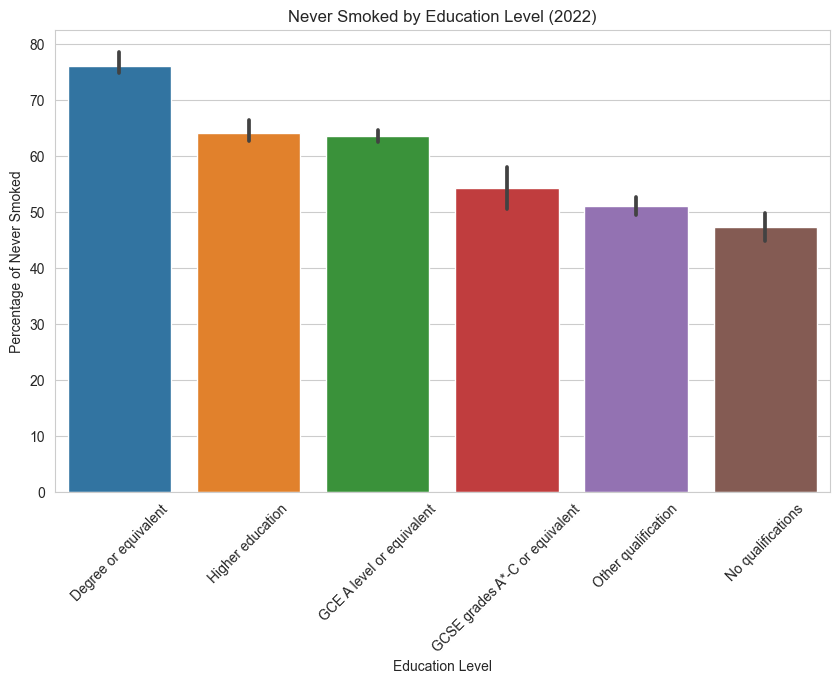

In [9]:

# Create a bar plot for never smoked by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Highest_level_of_education', y='2022_Never_smoked_%', data=data_2022)
plt.xticks(rotation=45)
plt.title('Never Smoked by Education Level (2022)')
plt.ylabel('Percentage of Never Smoked')
plt.xlabel('Education Level')
plt.show()

In [10]:
# Display the cleaned column names
print(data.columns.tolist())

# Extract the years present in the dataset based on column names
years = list(set([col.split('_')[0] for col in data.columns if col.split('_')[0].isdigit()]))
print("Years found in the dataset:", years)

# List of smoking status categories
smoking_statuses = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']

# Correct column names for melting
columns_to_melt = {}
for status in smoking_statuses:
    columns_to_melt[status] = [col for col in data.columns if status in col]

print("Columns to melt for each status:", columns_to_melt)

# Initialize an empty list to store dataframes
dfs = []

# Loop through each smoking status to melt the data
for status, status_cols in columns_to_melt.items():
    status_df = data.melt(id_vars=['Country', 'Highest_level_of_education'],
                          value_vars=status_cols,
                          var_name='Year_Status',
                          value_name=status)
    
    # Extract year from the combined Year_Status column
    status_df['Year'] = status_df['Year_Status'].str.extract('(\d{4})').astype(int)
    
    # Drop the Year_Status column
    status_df = status_df.drop(columns=['Year_Status'])
    
    # Append the melted dataframe to the list
    dfs.append(status_df)

# Merge the dataframes on common columns
data_long = dfs[0]
for df in dfs[1:]:
    data_long = pd.merge(data_long, df, on=['Country', 'Highest_level_of_education', 'Year'])

print(data_long.head())

['Country_code', 'Country', 'Highest_level_of_education', '2022_Current_smokers_%', '2022Current_smokers_LCL', '2022_Current_smokers_UCL', '2022Ex-smokers_%', '2022_Ex-smokers_LCL', '2022_Ex-smokers_UCL', '2022_Never_smoked_%', '2022_Never_smoked_LCL', '2022_Never_smoked_UCL', '2022_Weighted_count_[note_2]', '2022_Sample_size_[note_3]', '2021_Current_smokers_%', '2021_Current_smokers_LCL', '2021_Current_smokers_UCL', '2021_Ex-smokers_%', '2021_Ex-smokers_LCL', '2021_Ex-smokers_UCL', '2021_Never_smoked_%', '2021_Never_smoked_LCL', '2021_Never_smoked_UCL', '2021_Weighted_count_[note_2]', '2021_Sample_size_[note_3]', '2020_Current_smokers_%', '2020_Current_smokers_LCL', '2020_Current_smokers_UCL', '2020_Ex-smokers_%', '2020_Ex-smokers_LCL', '2020_Ex-smokers_UCL', '2020_Never_smoked_%', '2020_Never_smoked_LCL', '2020_Never_smoked_UCL', '2020_Weighted_count_[note_2]', '2020_Sample_size_[note_3]', '2019_Current_smokers_%', '2019_Current_smokers_LCL', '2019_Current_smokers_UCL', '2019_Ex-smok

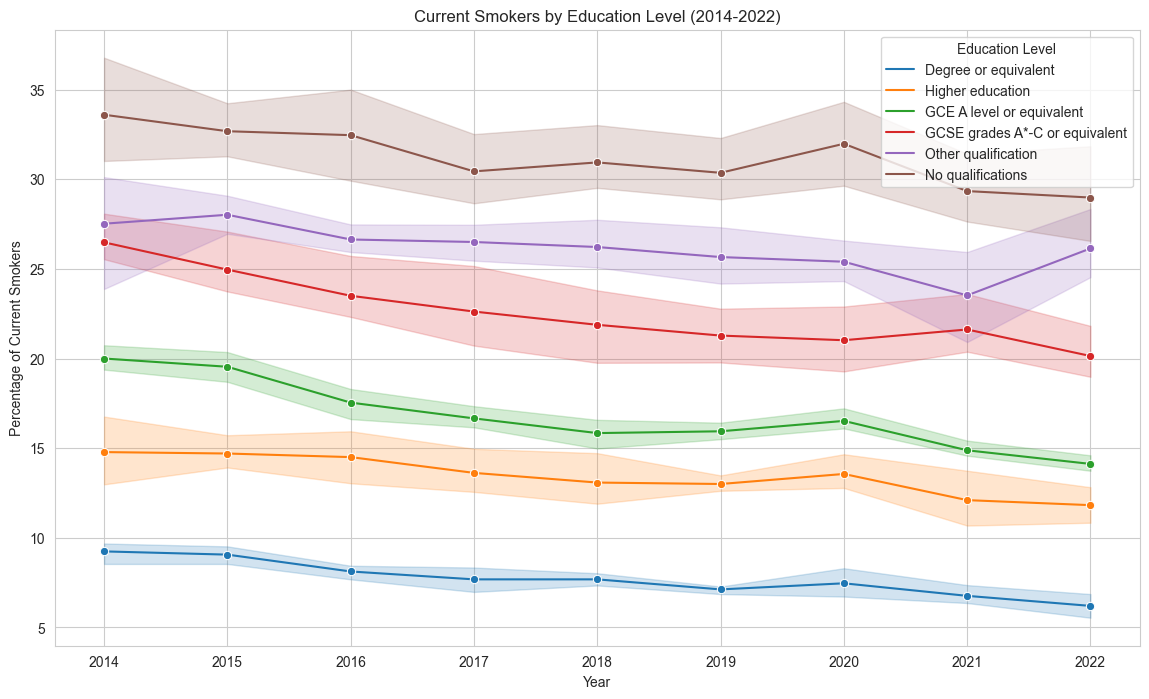

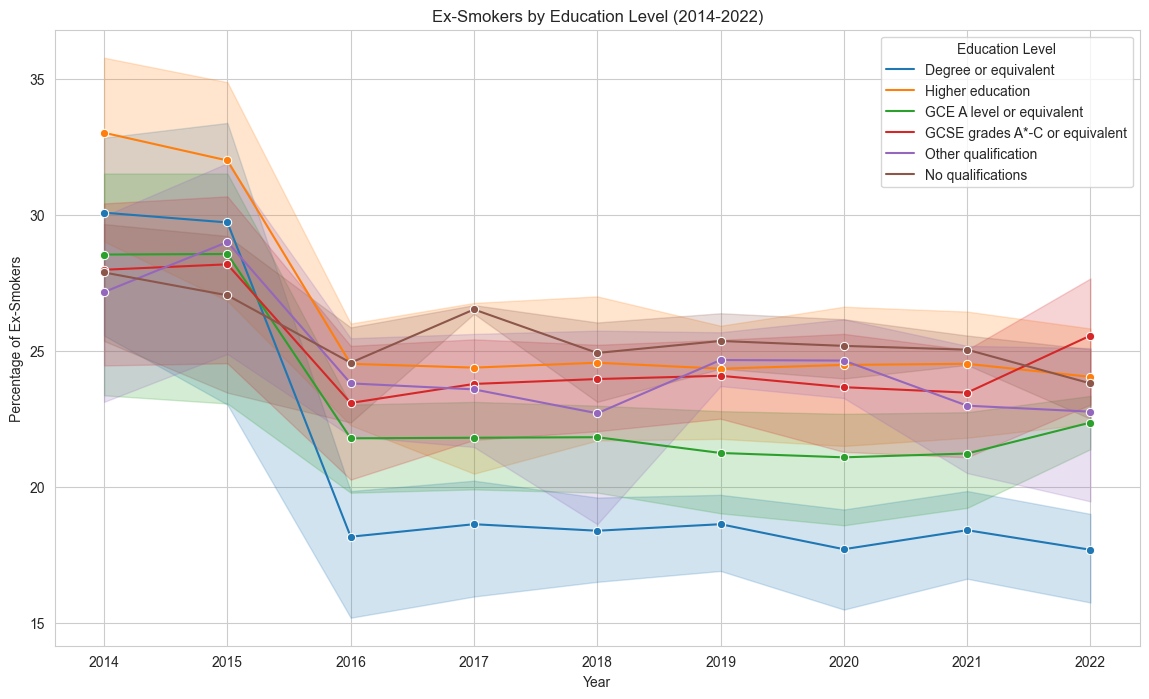

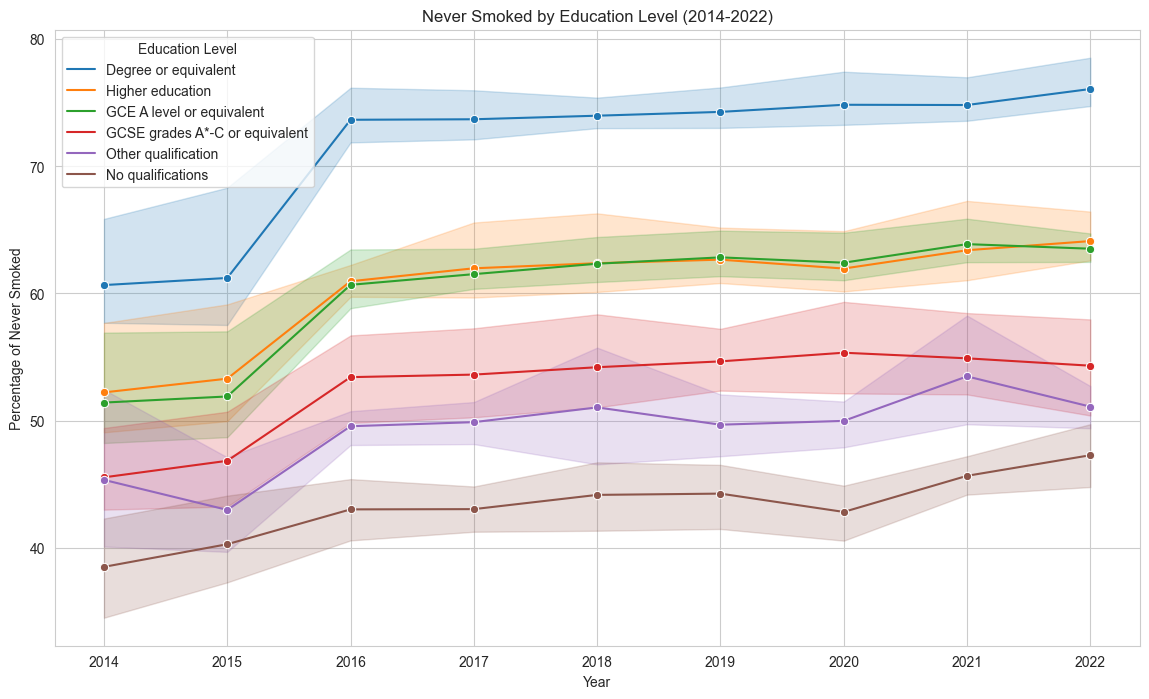

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create line plots for each smoking category by education level
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, titles):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Year', y=category, hue='Highest_level_of_education', data=data_long, marker='o')
    plt.title(f'{title} by Education Level (2014-2022)')
    plt.ylabel(f'Percentage of {title}')
    plt.xlabel('Year')
    plt.legend(title='Education Level')
    plt.show()


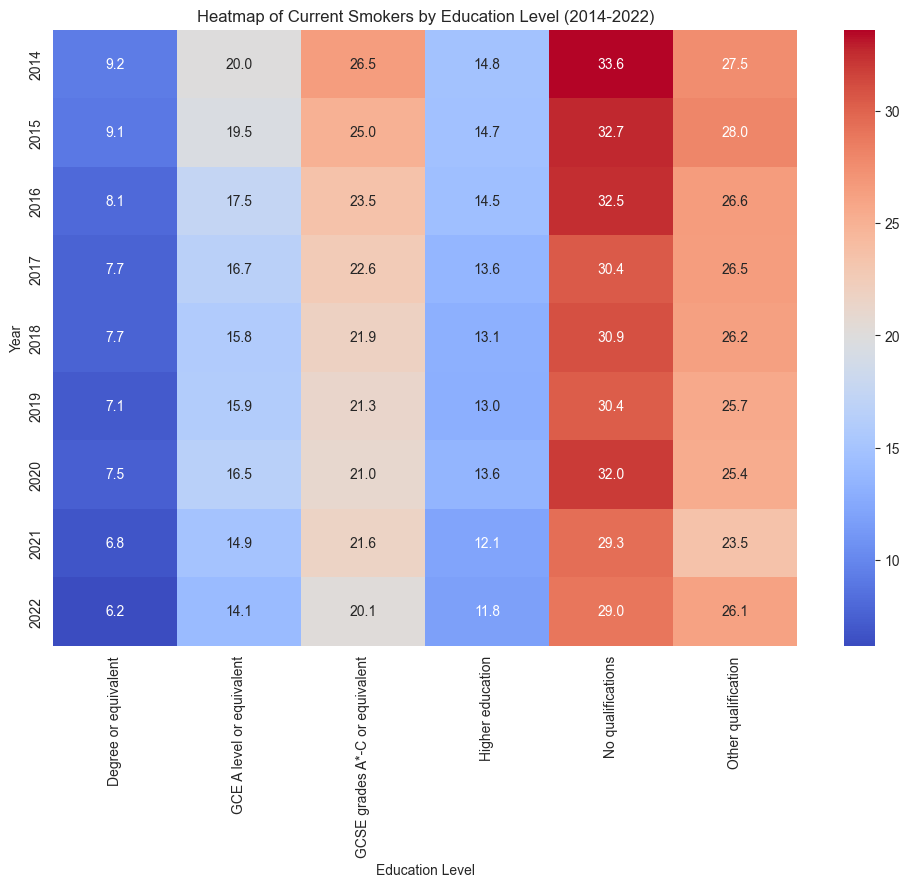

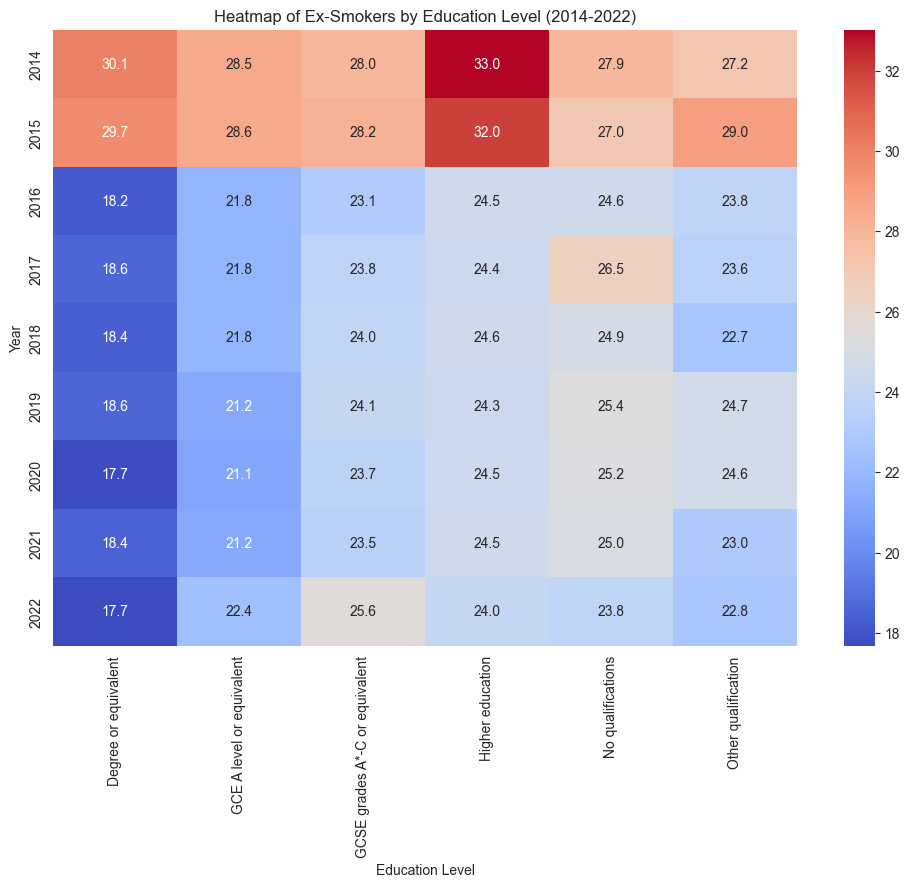

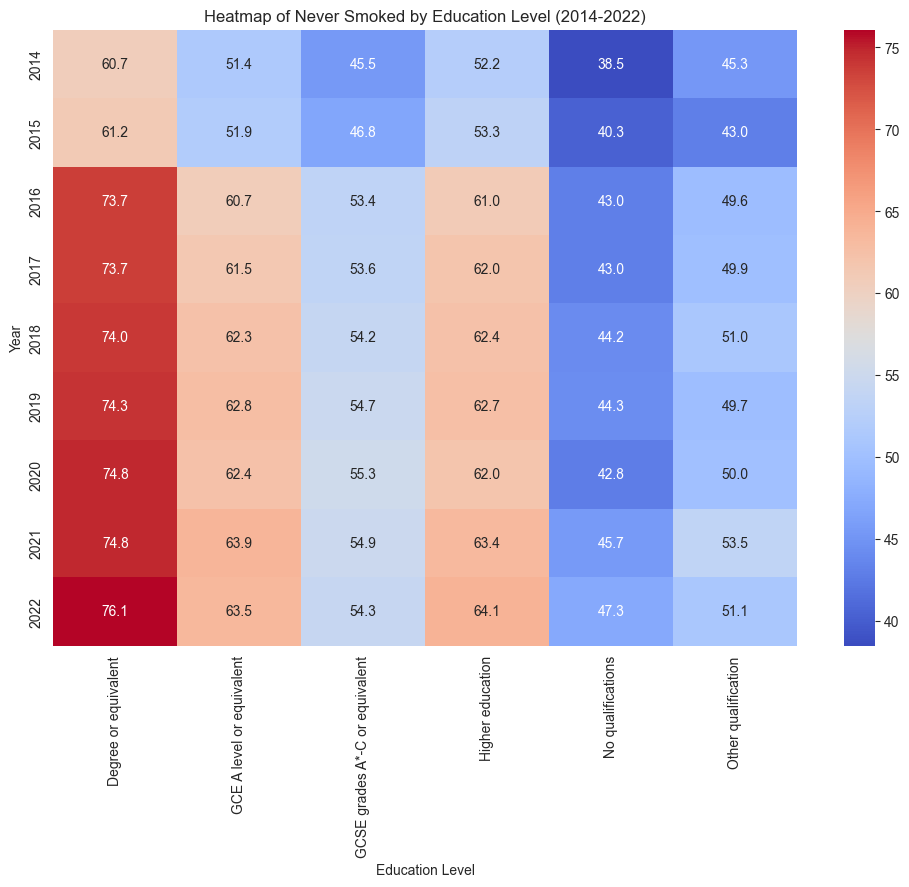

In [37]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a heatmap for each smoking category by education level and year
smoking_categories = ['Current_smokers_%', 'Ex-smokers_%', 'Never_smoked_%']
heatmap_titles = ['Current Smokers', 'Ex-Smokers', 'Never Smoked']

for category, title in zip(smoking_categories, heatmap_titles):
    heatmap_data = data_long.pivot_table(index='Year', columns='Highest_level_of_education', values=category)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
    plt.title(f'Heatmap of {title} by Education Level (2014-2022)')
    plt.ylabel('Year')
    plt.xlabel('Education Level')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


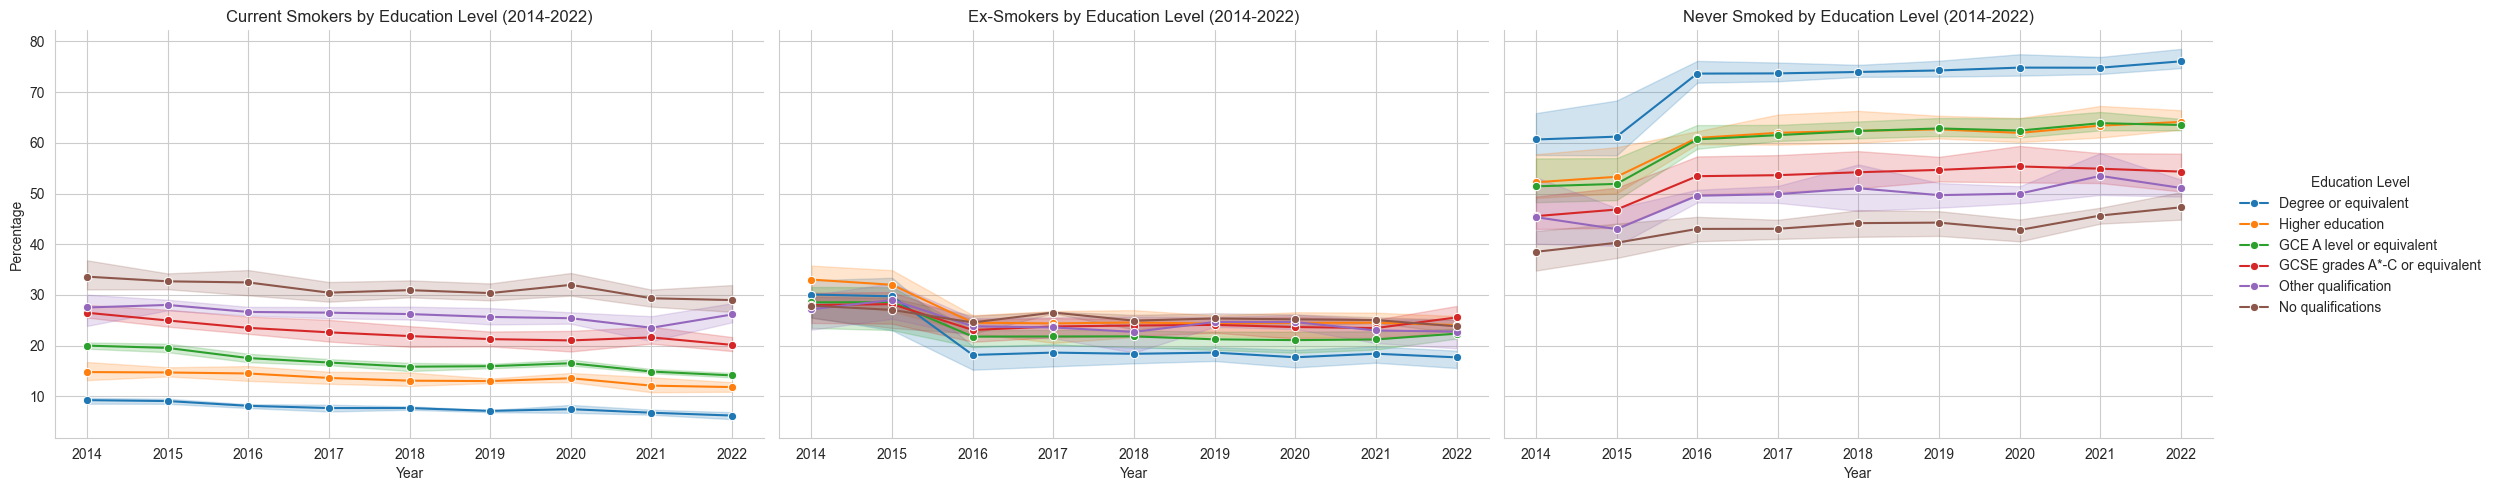

In [38]:
# Prepare the data for facet grid
data_long_melted = data_long.melt(id_vars=['Year', 'Highest_level_of_education'], value_vars=smoking_categories, 
                                  var_name='Smoking_Category', value_name='Percentage')

# Create a facet grid for the smoking categories
g = sns.FacetGrid(data_long_melted, col='Smoking_Category', hue='Highest_level_of_education', col_order=smoking_categories, height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Percentage', marker='o')
g.add_legend(title='Education Level')

# Set the titles for each facet
facet_titles = {
    'Current_smokers_%': 'Current Smokers by Education Level (2014-2022)',
    'Ex-smokers_%': 'Ex-Smokers by Education Level (2014-2022)',
    'Never_smoked_%': 'Never Smoked by Education Level (2014-2022)'
}

for ax in g.axes.flat:
    ax.set_title(facet_titles[ax.get_title().split('=')[1].strip()])

plt.show()
